# DoE | Análisde de Resultados de Experimentos com Python

Nesta atividade, vamos analisar resultados de experimentos fatoriais. Iniciaremos por uma análise mais simples e manuale e avançaremos com o uso da ANOVA.

Vamos utilizar o dataset CAKE [cake.csv](https://drive.google.com/file/d/1Xgmkg5PqfbbEvLinsUtMrbK_JWhIXVzY/view?usp=drive_link).

> Fonte original do Dataset: NIST - National Institute of Standards and Technology - U.S. Commerce Department.

# Atividade 0 - Baixe e Importe o Dataset
Importe o arquivo como dataframe do Pandas

In [ ]:
import pandas as pd

In [ ]:
fname = "tenis.csv"

df = pd.read_csv(fname)
df

,QUADRA,RAQUETE,PERFORMANCE
0,1,1,88
1,1,1,90
2,1,-1,93
3,1,-1,91
4,-1,1,88
5,-1,1,91
6,-1,-1,92
7,-1,-1,94


# Atividade 1 (Opcional) - Plote os experimentos presentes na Tabela
Sugestão: utilize a ferramenta `PairGrid` do Seaborn

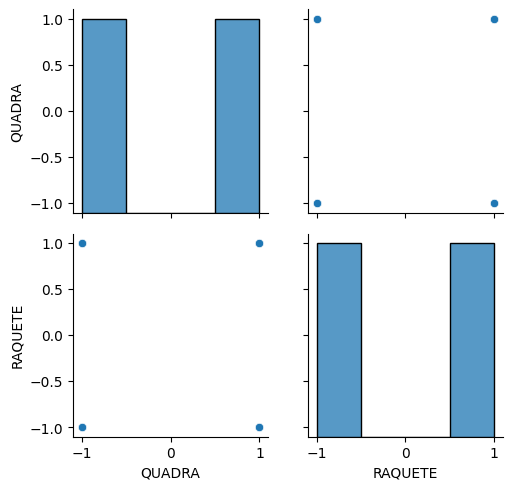

In [ ]:
import seaborn as sns

# PairGrid
g = sns.PairGrid( df[df.columns[:-1]] )

g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

g.add_legend()

In [ ]:
df

,QUADRA,RAQUETE,PERFORMANCE
0,1,1,88
1,1,1,90
2,1,-1,93
3,1,-1,91
4,-1,1,88
5,-1,1,91
6,-1,-1,92
7,-1,-1,94


# Atividade 2 - Divida o dataframe e calcule os efeitos do primeiro fator

In [ ]:
# QUADRA 1 / A

df_quadra_a = df[df['QUADRA']==1]
quadra_a = df_quadra_a['PERFORMANCE'].mean()

print(quadra_a)
df_quadra_a

90.5


,QUADRA,RAQUETE,PERFORMANCE
0,1,1,88
1,1,1,90
2,1,-1,93
3,1,-1,91


In [ ]:
# QUADRA -1 / B

df_quadra_b = df[df['QUADRA']==-1]
quadra_b = df_quadra_b['PERFORMANCE'].mean()

print(quadra_b)
df_quadra_b

91.25


,QUADRA,RAQUETE,PERFORMANCE
4,-1,1,88
5,-1,1,91
6,-1,-1,92
7,-1,-1,94


In [ ]:
efeito_quadra = abs(quadra_a - quadra_b)
efeito_quadra

# Atividade 2 - Divida o dataframe e calcule os efeitos do segundo fator

In [ ]:
# RAQUETE 1 / A

df_raquete_a = df[df['RAQUETE']==1]
raquete_a = df_raquete_a['PERFORMANCE'].mean()

print(raquete_a)
df_raquete_a

89.25


,QUADRA,RAQUETE,PERFORMANCE
0,1,1,88
1,1,1,90
4,-1,1,88
5,-1,1,91


In [ ]:
# RAQUETE -1 / B

df_raquete_b = df[df['RAQUETE']==-1]
raquete_b = df_raquete_b['PERFORMANCE'].mean()

print(raquete_b)
df_raquete_b

92.5


,QUADRA,RAQUETE,PERFORMANCE
2,1,-1,93
3,1,-1,91
6,-1,-1,92
7,-1,-1,94


In [ ]:
efeito_raquete = abs(raquete_a - raquete_b)
efeito_raquete

3.25

# Atividade 3 - Calcule o Efeito combinado
Dica: Esse efeito é obtido a partir das Diagonais

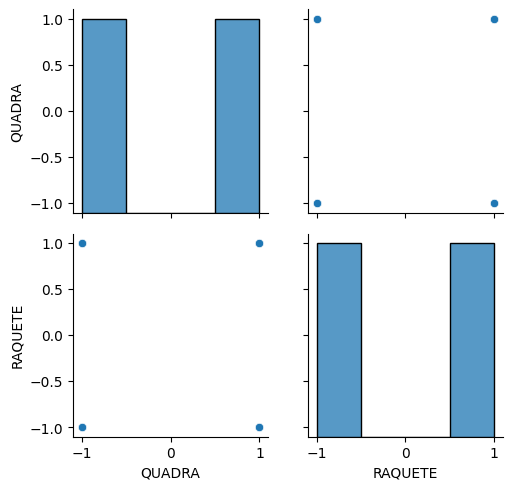

In [ ]:
import seaborn as sns

# PairGrid
g = sns.PairGrid( df[df.columns[:-1]] )

g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

g.add_legend()

In [ ]:
# efeito da diagonal ascendente

#[1,1]
d_aa = df[(df['QUADRA']==1) & (df['RAQUETE']==1)]
aa = d_aa['PERFORMANCE'].mean()
aa

#[1,1]
d_bb = df[(df['QUADRA']==-1) & (df['RAQUETE']==-1)]
bb = d_bb['PERFORMANCE'].mean()
bb

# combinar os resultar
interacao_aabb = (aa + bb) / 2
interacao_aabb

91.0

In [ ]:
# efeito da diagonal descendente

#[1,-1]
d_ab = df[(df['QUADRA']==1) & (df['RAQUETE']==-1)]
ab = d_ab['PERFORMANCE'].mean()
ab

#[-1,1]
d_ba = df[(df['QUADRA']==-1) & (df['RAQUETE']==1)]
ba = d_ba['PERFORMANCE'].mean()
ba

# combinar os resultar
interacao_abba = (ab + ba) / 2
interacao_abba

90.75

In [ ]:
# efeito combinado

efeito_interacao = abs(interacao_aabb - interacao_abba)
efeito_interacao

0.25

In [ ]:
print(efeito_quadra)
print(efeito_raquete)
print(efeito_interacao)

0.75
3.25
0.25


In [ ]:
df

,QUADRA,RAQUETE,PERFORMANCE
0,1,1,88
1,1,1,90
2,1,-1,93
3,1,-1,91
4,-1,1,88
5,-1,1,91
6,-1,-1,92
7,-1,-1,94


# Atividade 4 - Crie um Modelo de Efeitos Fixos e faça a Análise Estatística

**Análise Estatística do Modelo de Efeitos Fixos (Fixed Effects Model)**

O modelo de efeitos fixos assume que os níveis de cada fator são fixos e pré-determinados. Isso significa que o objetivo do experimento é avaliar o efeito dos diferentes níveis dos fatores, em vez de fazer inferências sobre uma população mais ampla.

A análise estatística do modelo de efeitos fixos envolve a construção de um modelo matemático que relaciona os níveis dos fatores com as variáveis de resposta. Normalmente, utiliza-se a regressão linear para estabelecer essa relação.

Atividade 4.1: Crie o Modelo
Sugestão: utilize o OLS (Ordinary Least Squares / Mínimos Quadrados Ordinários)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

funcao = 'PERFORMANCE ~ QUADRA + RAQUETE + QUADRA*RAQUETE'
modelo = ols(funcao,df).fit()

,df,sum_sq,mean_sq,F,PR(>F)
QUADRA,1.0,1.125,1.125,0.428571,0.548424
RAQUETE,1.0,21.125,21.125,8.047619,0.047018
QUADRA:RAQUETE,1.0,0.125,0.125,0.047619,0.837940
Residual,4.0,10.500,2.625,NaN,NaN


In [ ]:
modelo.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PERFORMANCE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     2.841
Date:                Fri, 07 Jul 2023   Prob (F-statistic):              0.169
Time:                        12:06:58   Log-Likelihood:                -12.439
No. Observations:                   8   AIC:                             32.88
Df Residuals:                       4   BIC:                             33.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         90.8750      0.573    158.644      0.000      89.285      92.465
QUADRA            -0.3750      0.573     -0.655      0.548      -1.965       1.215
RAQUETE           -1.6250      0.573     -2.837      0.047      -3.215      -0.035
QUADRA:RAQUETE     0.1250      0.573      0.218      0.838      -1.465       1.715
==============================================================================
Omnibus:                        5.498   Durbin-Watson:                   2.619
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                1.116
Skew:                           0.000   Prob(JB):                        0.572
Kurtosis:                       1.170   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Atividade 4.2 - Faça a Análise Estatística do Modelo Utilizando ANOVA

In [ ]:
anova = sm.stats.anova_lm(modelo)
anova

Atividade 4.3 - Faça o Teste T de Student e verifique quais Fatores tiveram efeitos estatisticamente relevantes

Instrução: considere um nível de confiança esperado como 95%


Sugestão: utilize a função `ppf` do `scipy`.

A função `ppf` calcula a **função de distribuição cumulativa inversa** e leva no mínimo 2 argumentos: ppf(q,df).
> Obs: Os outros argumentos são: loc (média) e escala (desvio padrão) - ambos opcionais (quando não declarados, o padrão é 0 e 1, respectivamente).

Por definição, um resultado de x para um determinado valor q e df significa P{T <= x} = q, ou seja, há probabilidade q de obter resultados menores ou iguais a x de uma distribuição T com o local e a escala fornecidos.


Considerando um nível de confiança de 95%, você deseja que 5% da probabilidade esteja nas extremidades da distribuição. Isso geralmente é feito simetricamente para que 2,5% esteja em cada cauda, portanto, você usaria valores q de 0,025 e 0,975 para os pontos de corte inferior e superior, respectivamente.

In [ ]:
from scipy.stats import t

tst = t.ppf(0.975,4)
tst

2.7764451051977987